# python机器学习之用逻辑回归制作评分卡（个人消费类贷款数据案例实战）

## 一、数据清洗

### 1、导库，获取数据

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
 
#其实日常在导库的时候，并不是一次性能够知道我们要用的所有库的。
#通常都是在建模过程中逐渐导入需要的库。
# data = pd.read_csv('../数据/rankingcard.csv',index_col=0)
# data.head()
data = pd.read_csv(r"D:\soft_code\machine_learning\machinelearning\ML_example_cv_gridsearch\GiveMeSomeCredit\cs-training.csv").drop(columns = 'Unnamed: 0')
data.SeriousDlqin2yrs = data.SeriousDlqin2yrs.astype('int')
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### 2、探索数据与数据预处理

In [2]:
#观察数据结构
data.shape#(150000, 11)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int32  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [3]:
#去除重复值
data.drop_duplicates(inplace=True)#inplace=True表示替换原数据
data.info()
#删除之后千万不要忘记，恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int32  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [4]:
#探索缺失值
data.info()
# data.isnull().sum()/data.shape[0]#得到缺失值的比例
data.isnull().mean()#上一行代码的另一种形式书写

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int32  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

### 3、使用随机森林填补缺失值

In [5]:
def remove_outliers(df):
    df = df[df['NumberOfTime30-59DaysPastDueNotWorse'] <= 10]
    df = df[df['NumberOfTime30-59DaysPastDueNotWorse'] < 96]
    df = df[df['NumberOfTime60-89DaysPastDueNotWorse'] < 96]
    df = df[df['NumberOfTimes90DaysLate'] < 96]
    df = df.loc[(df['DebtRatio'] <= df['DebtRatio'].quantile(0.95))]
    df = df.loc[(df['age'] >= 20)]
    return df

data = remove_outliers(data)
data.shape
# 填充缺失值
data['NumberOfDependents'].fillna(0,inplace=True)

In [6]:
# def fill_missing_rf(X,y,to_fill):

#     """
#     使用随机森林填补一个特征的缺失值的函数

#     参数：
#     X：要填补的特征矩阵
#     y：完整的，没有缺失值的标签
#     to_fill：字符串，要填补的那一列的名称
#     """

#     #构建我们的新特征矩阵和新标签
#     df = X.copy()
#     fill = df.loc[:,to_fill]
#     df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)

#     # 找出我们的训练集和测试集
#     Ytrain = fill[fill.notnull()]
#     Ytest = fill[fill.isnull()]
#     Xtrain = df.iloc[Ytrain.index,:]
#     Xtest = df.iloc[Ytest.index,:]

#     #用随机森林回归来填补缺失值
#     from sklearn.ensemble import RandomForestRegressor as rfr
#     rfr = rfr(n_estimators=100)
#     rfr = rfr.fit(Xtrain, Ytrain)
#     Ypredict = rfr.predict(Xtest)

#     return Ypredict


# 写法1
# def fill_missing_rf(data,to_fill):
     
#     # 使用随机森林填补一个特征的缺失值的函数
#     # to_fill = 'MonthlyIncome'
#     train_data = data.dropna()
#     test_data = data.loc[data[to_fill].isna()]
#     print(data.shape,train_data.shape,test_data.shape)
#     from sklearn.ensemble import RandomForestRegressor as rfr
#     rfr = rfr(n_estimators=100)
#     rfr = rfr.fit(train_data.loc[:,train_data.columns != to_fill], train_data[to_fill])
#     Ypredict = rfr.predict(test_data.loc[:,train_data.columns != to_fill])
#     return(Ypredict)
# 写法2

def fill_missing_rf(data,to_fill):
    # 使用随机森林填补一个特征的缺失值的函数
    # to_fill = 'MonthlyIncome'
    train_data = data.dropna()
    test_data = data.loc[data[to_fill].isna()].drop(columns=to_fill)
    print(data.shape,train_data.shape,test_data.shape)
    X=train_data.drop(columns=to_fill)
    y=train_data[to_fill]
    print(X.shape,y.shape)

    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=30)
    rfr = rfr.fit(X,y)
    Ypredict = rfr.predict(test_data)
    return(Ypredict)

In [7]:
y_pred = fill_missing_rf(data,to_fill = "MonthlyIncome")
data.loc[data["MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

data.info()

(141703, 11) (119643, 11) (22060, 10)
(119643, 10) (119643,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 141703 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      141703 non-null  int32  
 1   RevolvingUtilizationOfUnsecuredLines  141703 non-null  float64
 2   age                                   141703 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  141703 non-null  int64  
 4   DebtRatio                             141703 non-null  float64
 5   MonthlyIncome                         141703 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       141703 non-null  int64  
 7   NumberOfTimes90DaysLate               141703 non-null  int64  
 8   NumberRealEstateLoansOrLines          141703 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  141703 non-null  int64  
 10  NumberO

### 4、描述性统计处理异常值

In [8]:
#描述性统计
# data.describe()
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,141703.0,0.066738,0.249569,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,141703.0,5.863975,249.263592,0.0,0.0,0.003158,0.029567,0.15163,0.554887,0.978775,1.098292,50708.0
age,141703.0,52.269726,14.882573,21.0,24.0,32.000000,41.000000,52.00000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,141703.0,0.244850,0.692513,0.0,0.0,0.000000,0.000000,0.00000,0.000000,1.000000,3.000000,10.0
DebtRatio,141703.0,140.634327,444.647550,0.0,0.0,0.030536,0.168248,0.34771,0.689655,375.000000,2196.000000,2458.0
MonthlyIncome,141703.0,5712.612123,13521.048163,0.0,0.0,0.366667,2322.150000,4676.00000,7588.000000,11000.000000,23873.520000,3008750.0
NumberOfOpenCreditLinesAndLoans,141703.0,8.382751,5.106872,0.0,0.0,3.000000,5.000000,8.00000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,141703.0,0.092496,0.491065,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,17.0
NumberRealEstateLoansOrLines,141703.0,0.976408,1.104625,0.0,0.0,0.000000,0.000000,1.00000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,141703.0,0.065503,0.331564,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,11.0


### 5、样本不均衡问题

In [9]:
#探索标签的分布
X = data.iloc[:,1:]
y = data.iloc[:,0]
 
y.value_counts()#查看每一类别值得数据量，查看样本是否均衡
 
n_sample = X.shape[0]
 
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]
 
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))
#样本个数：149165; 1占6.62%; 0占93.38%

样本个数：141703; 1占6.67%; 0占93.33%


### 6、使用采样方法来平衡样本

In [10]:
#如果报错，就在prompt安装：pip install imblearn
# import imblearn
#imblearn是专门用来处理不平衡数据集的库，在处理样本不均衡问题中性能高过sklearn很多
#imblearn里面也是一个个的类，也需要进行实例化，fit拟合，和sklearn用法相似
 

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.1,k_neighbors=5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)


# #smote
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42) #实例化
# X,y = sm.fit_sample(X,y)
 
n_sample_ = X.shape[0]#278584

pd.Series(y).value_counts()
 
n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]
 
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))
#样本个数：278584; 1占50.00%; 0占50.00%


样本个数：39672; 1占33.33%; 0占66.67%


### 7、分训练集和测试集

In [11]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)
 
X_train, X_vali, Y_train, Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)
model_data = pd.concat([Y_train, X_train], axis=1)#训练数据构建模型
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns
 
vali_data = pd.concat([Y_vali, X_vali], axis=1)#验证集
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns
 
# model_data.to_csv(r".\model_data.csv")#训练数据
# vali_data.to_csv(r".\vali_data.csv")#验证数据

## 二、分箱

分箱步骤：

1）我们首先把连续型变量分成一组数量较多的分类型变量，比如，将几万个样本分成100组，或50组

2）确保每一组中都要包含两种类别的样本，否则IV值会无法计算

3）我们对相邻的组进行卡方检验，卡方检验的P值很大的组进行合并，直到数据中的组数小于设定的N箱为止

4）我们让一个特征分别分成[2,3,4…20]箱，观察每个分箱个数下的IV值如何变化，找出最适合的分箱个数

5）分箱完毕后，我们计算每个箱的WOE值， bad%，观察分箱效果

In [12]:
import scipy
def chimerge(data,col,target,n=20,alpha=0.05,max_groups=8,min_groups = 4):
    '''
    data: 输入的pandas DataFrame数据集
    col: 需要分箱得连续型变量名
    target: Y值
    n:初始化分箱的个数，一般选取比较大的值（使用的是等距分箱）
    alpha：卡方分布的显著性水平
    max_groups: 最大分箱个数
    '''
    # 先进行初略的等距分箱
    df = data[[col,target]]
    # df['cut'],bins = pd.cut(df[col],bins=n,retbins=True,right=False)   # right=False,使得区间为左闭右开如[0,10)，与下面的cutoff相一致

    df['cut'],bins = pd.qcut(df[col], retbins=True, q=n,duplicates="drop")

    freq_tab = pd.crosstab(df['cut'],df[target],dropna=False)  # 注意要添加dropna=False，否则全为0的组就不显示
    freq = freq_tab.values  # 转换为array数组
    cutoff = bins[:-1]      # 分组区间是左闭右开的，如cutoffs = [1,2,3]，则表示区间 [1,2) , [2,3) ,[3,3+)。
    
    # 以下代码确保每一箱中都有target正负样本
    # 这样做的好处一是后续如果计算WOE时有这个需要，二是也能保证计算的期望频数fe不为0。

    for i in range(n):
    # 如果第一箱没有包含正样本或负样本，则向下一组合并
    # 但即使原来第一箱和第二进行和合并，还是不能保证新的第一箱都包含正负样本，故使用continue跳出本次循环，开始下一次循环
        if 0 in freq[0]:
            freq[0] = freq[0] + freq[1]
            freq =  np.delete(freq,1,0)
            cutoff = np.delete(cutoff,1,0)
            continue
    # 经过上面代码确保第一箱都包含正负样本，则判断之后的每箱，是否都包含正负样本，如果不包含，则向前一箱合并
        for i in range(1,len(freq)):
            if 0 in freq[i]:
                freq[i-1] = freq[i] + freq[i-1]
                freq =  np.delete(freq,i,0)
                cutoff = np.delete(cutoff,i,0)
                break
        else:
            break

   # 计算相邻箱的卡方值
    threshold = scipy.stats.chi2.isf(alpha,freq.shape[-1])  # 卡方阈值根据显著性水平和自由度设置
    while len(freq) > max_groups:     # 先根据设定的最大分箱数，合并最小的卡方值
        chi_vs=[]
        for i in range(len(freq)-1):
            chi_v = scipy.stats.chi2_contingency(freq[i:i+2])[0]
            chi_vs.append(chi_v)
        i = chi_vs.index(min(chi_vs))
        freq[i] = freq[i] + freq[i+1]
        freq = np.delete(freq,i+1,0)
        cutoff = np.delete(cutoff,i+1,0)


  # 按照预先设定的分箱数合并完毕后，如果发现最小卡方值还有低于卡方阈值的再接着合并
    while  len(freq)>min_groups:   
        for i in range(len(freq)-1):
            chi_vs=[]
            chi_v = scipy.stats.chi2_contingency(freq[i:i+2])[0]
            chi_vs.append(chi_v)
        if min(chi_vs) < threshold:
            i = chi_vs.index(min(chi_vs))
            freq[i] = freq[i] + freq[i+1]
            freq = np.delete(freq,i+1,0)
            cutoff = np.delete(cutoff,i+1,0)
            continue
        else:
            break
    return cutoff,freq


### 定义WOE和IV函数

In [13]:
#计算WOE和BAD RATE
#BAD RATE与bad%不是一个东西
#BAD RATE是一个箱中，坏的样本所占的比例 (bad/total)
#而bad%是一个箱中的坏样本占整个特征中的坏样本的比例
 
def get_woe(num_bins):
    # 通过 num_bins 数据计算 woe
    columns = ["min","max","count_0","count_1"]
    df = pd.DataFrame(num_bins,columns=columns)

    df["total"] = df.count_0 + df.count_1#一个箱子当中所有的样本数
    df["percentage"] = df.total / df.total.sum()#一个箱子里的样本数，占所有样本的比例
    df["bad_rate"] = df.count_1 / df.total#一个箱子坏样本的数量占一个箱子里边所有样本数的比例
    df["good%"] = df.count_0/df.count_0.sum()
    df["bad%"] = df.count_1/df.count_1.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df
 
#计算IV值
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv


In [14]:
def main_chimerge(data,col,target,n=20,alpha=0.05,max_groups=8):
    cutoff, freq= chimerge(model_data,col,"SeriousDlqin2yrs",n,alpha,max_groups)
    freq_df = pd.DataFrame(freq)
    num_bins = [*zip(cutoff,cutoff[1:],freq_df.iloc[:,0],freq_df.iloc[:,1])]
    bins_df = pd.DataFrame(get_woe(num_bins))
    return(bins_df)

In [15]:
# auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
#                 "age":5,
#                 "DebtRatio":4,
#                 "MonthlyIncome":3,
#                 "NumberOfOpenCreditLinesAndLoans":5}
auto_col_bins = ["RevolvingUtilizationOfUnsecuredLines","age","DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans"]
 
#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
            ,"NumberOfTimes90DaysLate":[0,1,2,17]
            ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
            ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
            ,"NumberOfDependents":[0,1,2,3]}
 
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值 
#原因：比如一些新的值出现，例如家庭人数为30，以前没出现过，改成范围为极大值之后，这些新值就都能分到箱里边了
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}
bins_of_col = {}
 
# 生成自动分箱的分箱区间和分箱后的 IV 值
 
for col in auto_col_bins:
    # bins_df = graphforbestbin(model_data,col
    #                          ,"SeriousDlqin2yrs"
    #                          ,n=auto_col_bins[col]
    #                          #使用字典的性质来取出每个特征所对应的箱的数量
    #                          ,q=20
    #                          ,graph=False)
    bins_df = main_chimerge(model_data,col,"SeriousDlqin2yrs",n=20,alpha=0.05,max_groups=8)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list
    
#合并手动分箱数据    
bins_of_col.update(hand_bins)
 
bins_of_col



e:\Anaconda\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.0499002,
  0.16015057076654152,
  0.3048497355,
  0.4930721370000001,
  0.7136005890000001,
  0.9876127865500001,
  inf],
 'age': [-inf, 34.0, 42.0, 50.0, 56.0, 60.0, 63.0, inf],
 'DebtRatio': [-inf,
  0.00665734925,
  0.3255182797,
  0.516923005540016,
  0.71561340275,
  4.0,
  273.0,
  inf],
 'MonthlyIncome': [-inf,
  0.13333333333333333,
  0.43333333333333335,
  673.9350000000001,
  3239.0,
  4500.0,
  5416.0,
  inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 11.0, 12.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

## 三、计算各箱的WOE并映射到数据中

In [17]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe
 
#将所有特征的WOE存储到字典当中
woeall = {}
for col in bins_of_col:
    print(col)
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])
    
woeall

RevolvingUtilizationOfUnsecuredLines
age
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTimes90DaysLate
NumberRealEstateLoansOrLines
NumberOfTime60-89DaysPastDueNotWorse
NumberOfDependents


{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.0499]    1.665805
 (0.0499, 0.16]    1.218706
 (0.16, 0.305]     0.570212
 (0.305, 0.493]    0.057521
 (0.493, 0.714]   -0.570071
 (0.714, 0.988]   -1.191556
 (0.988, inf]     -1.335739
 dtype: float64,
 'age': cut
 (-inf, 34.0]   -0.561793
 (34.0, 42.0]   -0.386072
 (42.0, 50.0]   -0.231332
 (50.0, 56.0]   -0.026288
 (56.0, 60.0]    0.299640
 (60.0, 63.0]    0.497953
 (63.0, inf]     1.096448
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.00666]     0.656355
 (0.00666, 0.326]    0.135379
 (0.326, 0.517]     -0.021719
 (0.517, 0.716]     -0.393797
 (0.716, 4.0]       -0.602158
 (4.0, 273.0]        0.274911
 (273.0, inf]        0.168222
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 0.133]        0.891041
 (0.133, 0.433]       0.180232
 (0.433, 673.935]    -0.072238
 (673.935, 3239.0]   -0.371057
 (3239.0, 4500.0]    -0.246029
 (4500.0, 5416.0]    -0.123708
 (5416.0, inf]        0.229465
 dtype: float64,
 'NumberOfOpenCreditLinesAndLo

In [18]:
#不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
model_woe = pd.DataFrame(index=model_data.index)
 
#将原数据分箱后，按箱的结果把WOE结构用map函数映射到数据中
model_woe["age"] = pd.cut(model_data["age"],bins_of_col["age"]).map(woeall["age"])
 
#对所有特征操作可以写成：
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])
    
#将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]
 
#这就是我们的建模数据了
model_woe.head()


,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.386072,1.665805,0.274911,-0.072238,-0.010348,0.470457,0.337044,0.238440,-1.785659,-0.322237,0
1,-0.026288,-0.570071,0.135379,-0.246029,-0.010348,-0.910045,0.337044,-0.268983,0.230240,-0.290671,0
2,0.497953,1.665805,-0.021719,0.229465,-0.010348,0.470457,0.337044,0.238440,0.230240,0.291426,0
3,0.299640,-0.570071,-0.021719,0.229465,-0.010348,-1.574876,0.337044,0.283520,-2.560847,0.291426,1
4,-0.561793,0.570212,0.135379,-0.123708,-0.010348,0.470457,0.337044,-0.268983,0.230240,-0.398348,0


## 四、建模与模型验证

In [19]:
vali_woe = pd.DataFrame(index=vali_data.index)
 
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]
 
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]


In [20]:
X = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LogisticRegression as LR
 
lr = LR().fit(X,y)
lr.score(vali_X,vali_y)#0.8641356370249832

0.7947403797681062

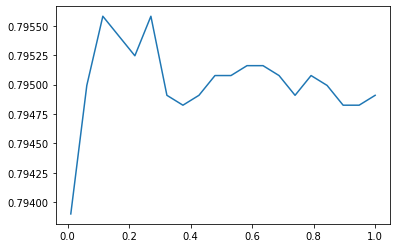

e:\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
e:\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
e:\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
e:\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
e:\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number o

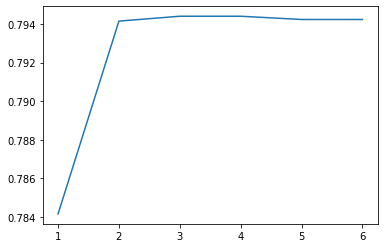

In [21]:
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.2,20)
 
score = []
for i in c_1: 
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(c_1,score)
plt.show()
 
lr.n_iter_#array([7], dtype=int32)
 
score = []
for i in [1,2,3,4,5,6]: 
    lr = LR(solver='liblinear',C=0.025,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

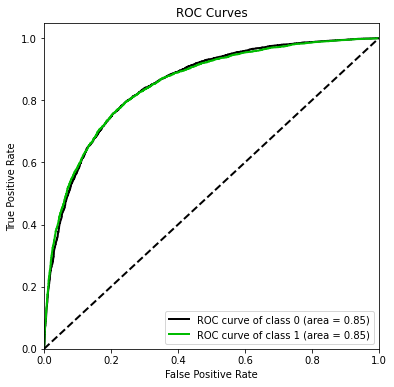

In [22]:
import scikitplot as skplt
 
#%%cmd
#pip install scikit-plot
 
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)


## 五、制作评分卡

In [23]:
# pdo =20 ,特定分数为60 , odds = 1/60
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
 
B,A

(28.85390081777927, 481.8621880878296)

In [24]:
base_score = A - B*lr.intercept_#lr.intercept_：截距
base_score#array([481.56390143])
 
score_age = woeall["age"] * (-B*lr.coef_[0][1])#lr.coef_：每一个特征建模之后得出的系数
score_age#"age"特征中每个箱对应的分数


cut
(-inf, 34.0]   -10.890077
(34.0, 42.0]    -7.483819
(42.0, 50.0]    -4.484266
(50.0, 56.0]    -0.509586
(56.0, 60.0]     5.808376
(60.0, 63.0]     9.652580
(63.0, inf]     21.254113
dtype: float64

In [25]:
file = r"D:\soft_code\machine_learning\machinelearning\ML_example_cv_gridsearch\GiveMeSomeCredit\ScoreData.csv"
 
#open是用来打开文件的python命令，第一个参数是文件的路径+文件名，如果你的文件是放在根目录下，则你只需要文件名就好
#第二个参数是打开文件后的用途，"w"表示用于写入，通常使用的是"r"，表示打开来阅读
#首先写入基准分数
#之后使用循环，每次生成一组score_age类似的分档和分数，不断写入文件之中
 
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(X.columns):#[*enumerate(X.columns)]
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")
